<a href="https://colab.research.google.com/github/O-NS23/Employee-Salary-Prediction/blob/main/EmployeeSalaryPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# INSTALL & IMPORT LIBRARIES
!pip install seaborn joblib --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import joblib


In [22]:
# LOAD DATASET
df = pd.read_csv('/content/salary_dataset.csv')

# Replace '?' with NaN, then fill missing with 'NotGiven'
df.replace('?', np.nan, inplace=True)
df.fillna('NotGiven', inplace=True)

print(" Dataset Loaded & Cleaned")
print("Shape of dataset:", df.shape)
print("\nFirst 5 rows:\n", df.head())
print("\nDataset info:")
print(df.info())

# Check missing values (should be 0 now)
print("\nMissing values after cleaning:\n", df.isnull().sum())

 Dataset Loaded & Cleaned
Shape of dataset: (48842, 15)

First 5 rows:
    age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18   NotGiven  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4           NotGiven    Own-child  White  Femal

In [23]:
# EXPLORATORY DATA ANALYSIS
plt.figure(figsize=(10, 6))
if 'salary' in df.columns:
    sns.boxplot(data=df, y='salary')  # Boxplot for salary distribution
    plt.title('Boxplot of Salary')
    plt.show()

print("\nCategorical Columns:\n", df.select_dtypes(include=['object']).columns.tolist())
print("\nNumeric Columns:\n", df.select_dtypes(include=['int64','float64']).columns.tolist())



Categorical Columns:
 ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']

Numeric Columns:
 ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']


<Figure size 1000x600 with 0 Axes>

In [24]:

# DEFINE FEATURES & TARGET

if 'salary' in df.columns and df['salary'].dtype != 'object':
    # Convert continuous salary to categories (Low, Medium, High)
    df['salary_category'] = pd.cut(df['salary'],
                                   bins=[0,50000,100000,200000],
                                   labels=['Low','Medium','High'])
    y = df['salary_category']
else:
    # If salary already categorical, use it
    y = df['salary'] if 'salary' in df.columns else df.iloc[:, -1]

# Drop salary columns from features
X = df.drop(['salary', 'salary_category'], axis=1, errors='ignore')

# Identify categorical & numeric features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numeric_features = X.select_dtypes(include=['int64','float64']).columns.tolist()

print(" Target defined. Features shape:", X.shape, "| Target shape:", y.shape)


# TRAIN-TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print(" Data Split Done")
print("Train Size:", X_train.shape, "Test Size:", X_test.shape)


 Target defined. Features shape: (48842, 15) | Target shape: (48842,)
 Data Split Done
Train Size: (39073, 15) Test Size: (9769, 15)


In [25]:
# PREPROCESSING PIPELINE
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# DEFINE MODELS
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "MLP Classifier": MLPClassifier(hidden_layer_sizes=(50,), max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(kernel='rbf', probability=True)
}

results = {}
print(" Preprocessing & Models Ready")


 Preprocessing & Models Ready


In [26]:
# TRAIN & EVALUATE MODELS

for model_name, model in models.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', model)])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results[model_name] = acc

    print("\n==============================")
    print(f"Model: {model_name}")
    print(f" Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

print("\n All models evaluated!")



Model: Logistic Regression
 Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

       <=50K       1.00      1.00      1.00      7431
        >50K       1.00      1.00      1.00      2338

    accuracy                           1.00      9769
   macro avg       1.00      1.00      1.00      9769
weighted avg       1.00      1.00      1.00      9769


Model: KNN
 Accuracy: 0.9899
Classification Report:
              precision    recall  f1-score   support

       <=50K       0.99      1.00      0.99      7431
        >50K       0.99      0.96      0.98      2338

    accuracy                           0.99      9769
   macro avg       0.99      0.98      0.99      9769
weighted avg       0.99      0.99      0.99      9769


Model: MLP Classifier
 Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

       <=50K       1.00      1.00      1.00      7431
        >50K       1.00      1.00      1.00      23

/tmp/ipython-input-43-198108819.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accuracy_scores, y=model_names, palette="viridis")


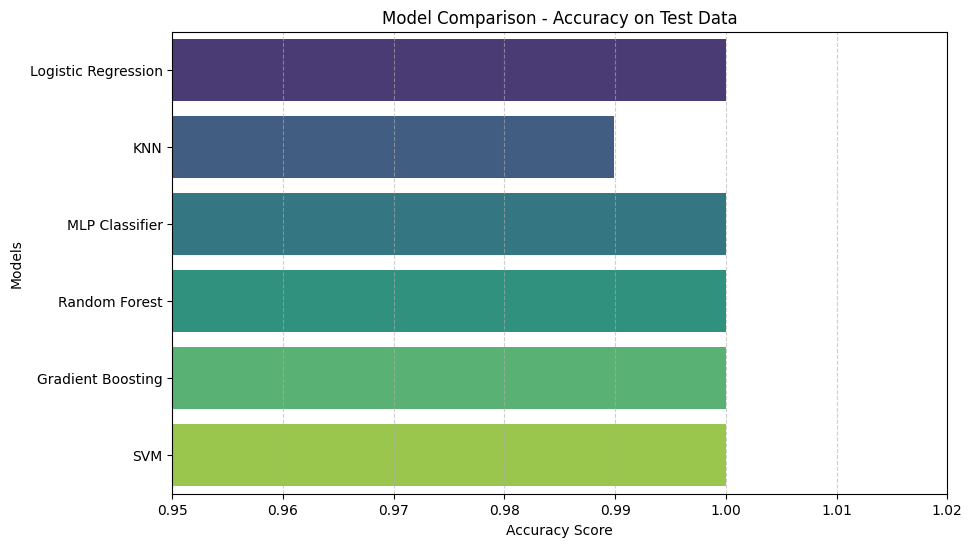

In [43]:
# MODEL ACCURACY COMPARISON GRAPH
plt.figure(figsize=(10, 6))
model_names = list(results.keys())
accuracy_scores = list(results.values())

sns.barplot(x=accuracy_scores, y=model_names, palette="viridis")
plt.xlabel("Accuracy Score")
plt.ylabel("Models")
plt.title("Model Comparison - Accuracy on Test Data")
plt.xlim(0.95, 1.02)  # accuracy between 0 and 1
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.show()




🏆 Best model: Logistic Regression with Accuracy: 1.0


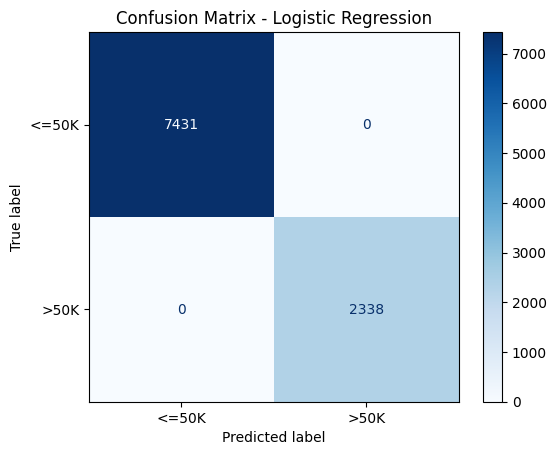

In [27]:
# FIND BEST MODEL
best_model_name = max(results, key=results.get)
print("\n🏆 Best model:", best_model_name, "with Accuracy:", results[best_model_name])

# Retrain best model
best_model = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', models[best_model_name])])
best_model.fit(X_train, y_train)
best_pred = best_model.predict(X_test)

# CONFUSION MATRIX
cm = confusion_matrix(y_test, best_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix - {best_model_name}")
plt.show()


In [28]:
# SAVE BEST MODEL
joblib.dump(best_model, "best_salary_model.pkl")
print("\nBest model saved as best_salary_model.pkl")



Best model saved as best_salary_model.pkl


In [29]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# Load the saved model
model = joblib.load("best_salary_model.pkl")

st.set_page_config(page_title="Employee Salary Prediction", layout="wide")

st.title("Employee Salary Prediction App")
st.write("Fill in the employee details below and predict the salary category.")

# Dynamically detect model input features
model_features = model.named_steps['preprocessor'].transformers_[1][2] + model.named_steps['preprocessor'].transformers_[0][2]

# Create input fields dynamically
input_data = {}
st.subheader("Employee Details")

for feature in model_features:
    if feature.lower().startswith("num_") or "age" in feature.lower() or "years" in feature.lower():
        # Numeric input
        input_data[feature] = st.number_input(f"Enter {feature}", value=0.0)
    else:
        # Text / Categorical input
        input_data[feature] = st.text_input(f"Enter {feature}", value="NotGiven")

# Prediction button
if st.button("Predict Salary Category"):
    # Create dataframe for prediction
    user_df = pd.DataFrame([input_data])

    # Predict
    pred = model.predict(user_df)[0]
    st.success(f"Predicted Salary Category: **{pred}**")


Overwriting app.py


In [30]:
!pip install streamlit pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 78.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 103.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.4 MB/s eta 0:00:00


In [32]:
!ngrok authtoken 30GwSGgLuqfGk4FOYWm0JjiaiHR_3R1p4ay2RRc18dgtRMMfU

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [34]:
import os
import threading
def run_streamlit():
  os.system( 'streamlit run app.py --server .port 8501')
thread = threading.Thread(target=run_streamlit)
thread.start()

In [36]:
from pyngrok import ngrok
import time
# Wait a few seconds to make sure Streamlit started
time.sleep(5)
# Create a tunnel to the Streamlit port 8501
public_url = ngrok.connect(8501)
print("Your Streamlit app is live here: ", public_url)

Your Streamlit app is live here:  NgrokTunnel: "https://c97a9a5912c5.ngrok-free.app" -> "http://localhost:8501"
